<a href="https://colab.research.google.com/github/TALeonard/19ma573thomasleonard/blob/master/src/hw2_ex_fd_v02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ex.

Suppose that we wish to approximate the first derivative $u'(x)$ of a very smooth function with an error of only $O(h)^4$, where $h$ is the step size. Which difference approximation could we use?

Based on research, we can consider this central difference:

$$\frac{f(x-2h)-8f(x-h)+8f(x+h)-f(x+2h)}{12h} \simeq f'(x)$$

__Prop__

The central finite difference for the second order has convergence order $4$.

__Proof__ 

First, we will consider the Taylor Series expansions for each of these 4 terms: $f(x-2h)$, $f(x-h)$, $f(x+h)$, and $f(x+2h)$. Each will be truncated at $O(h^{5})$.

$$f(x+h) = f(x)+f'(x)h+\frac{f''(x)(h^{2})}{2}+\frac{f'''(x)(h^{3})}{3!}+\frac{f^{(4)}(x)(h^{4})}{4!}+O(h^{5})$$

$$f(x-h) = f(x)+f'(x)(-h)+\frac{f''(x)(h^{2})}{2}+\frac{f'''(x)(-h^{3})}{3!}+\frac{f^{(4)}(x)(h^{4})}{4!}+O(h^{5})$$

$$f(x)+2h) = f(x)+f'(x)(2h)+\frac{f''(x)(4h^{2})}{2}+\frac{f'''(x)(8h^{3})}{3!}+\frac{f^{(4)}(x)(16h^{4})}{4!}+O(h^{5})$$

$$f(x-2h) = f(x)+f'(x)(-2h)+\frac{f''(x)(4h^{2})}{2}+\frac{f'''(x)(-8h^{3})}{3!}+\frac{f^{(4)}(x)(16h^{4})}{4!}+O(h^{5})$$

Now, consider combining these 4 expansions in the combination depicted in the numerator of the approximation, i.e. $f(x-2h)-8f(x-h)+8f(x+h)-f(x+2h)$. :

$$f(x-2h)-8f(x-h)+8f(x+h)-f(x+2h) = f(x)+f'(x)(-2h)+\frac{f''(x)(4h^{2})}{2}+\frac{f'''(x)(-8h^{3})}{3!}+\frac{f^{(4)}(x)(16h^{4})}{4!}+O(h^{5})$$
$$- 8*(f(x)+f'(x)(-h)+\frac{f''(x)(h^{2})}{2}+\frac{f'''(x)(-h^{3})}{3!}+\frac{f^{(4)}(x)(h^{4})}{4!}+O(h^{5})$$
$$+ 8*(f(x)+f'(x)h+\frac{f''(x)(h^{2})}{2}+\frac{f'''(x)(h^{3})}{3!}+\frac{f^{(4)}(x)(h^{4})}{4!}+O(h^{5}))$$
$$- (f(x)+f'(x)(2h)+\frac{f''(x)(4h^{2})}{2}+\frac{f'''(x)(8h^{3})}{3!}+\frac{f^{(4)}(x)(16h^{4})}{4!}+O(h^{5}))$$

Next, re-organize and combine:
$$f(x-2h)-8f(x-h)+8f(x+h)-f(x+2h) = f(x) - 8f(x) + 8f(x) - f(x) $$
$$-2hf'(x)+8hf'(x)+8hf'(x)-2hf'(x)$$
$$+ 2h^{2}f''(x) - 4h^{2}f''(x)+4h^{2}f''(x)-2h^{2}f''(x)$$
$$- \frac{4h^{3}f^{(3)}(x)}{3}+\frac{4h^{3}f^{(3)}(x)}{3}+\frac{4h^{3}f^{(3)}(x)}{3}-\frac{4h^{3}f^{(3)}(x)}{3}$$
$$+\frac{2h^{4}f^{(4)}(x)}{3}-\frac{h^{4}f^{(4)}(x)}{3}+\frac{h^{4}f^{(4)}(x)}{3}-\frac{2h^{4}f^{(4)}(x)}{3}+O(h^{5})$$

The $f(x)$, $f''(x)$, $f^{(3)}(x)$, and $f^{(4)}(x)$ terms all cancel each other out. Thus, we are left with
$$f(x-2h)-8f(x-h)+8f(x+h)-f(x+2h) =12hf'(x)+O(h^{5})$$

Now, we divide by 12h on both sides.
$$\frac{f(x-2h)-8f(x-h)+8f(x+h)-f(x+2h)}{12h} = f'(x) + \frac{O(h^{5})}{12h}$$

We can observe that $\frac{O(h^{5})}{12h} = O(h^{4})$, thus this simplifies to
$$\frac{f(x-2h)-8f(x-h)+8f(x+h)-f(x+2h)}{12h} = f'(x) + O(h^{4})$$

As the left-hand side is meant to approximate $f'(x)$ on the right-hand side, this means that the $O(h^{4})$ is our error. Thus, the convergence rate of this approximation is $4$. $\square$

Now, we shall verify that this works. Consider the function $sin(x)$ with $h = .5$ as in the other part of HW 2. The first derivative is $f'(x) = cos(x)$.

# Code for Assignment

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
def new_cfd(f, x, h):
    return (f(x-(2*h))-(8*f(x-h))+(8*f(x+h))-f(x+(2*h)))/(12*h)

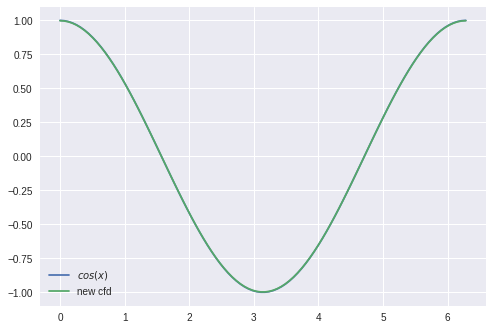

In [6]:
h = .5 #step size

x_co = np.linspace(0, 2*np.pi, 100)
plt.plot(x_co, np.cos(x_co), label = '$cos(x)$');
plt.plot(x_co, new_cfd(np.sin, x_co, h), label = 'new cfd');
plt.legend();

Now, plot the log-log chart.

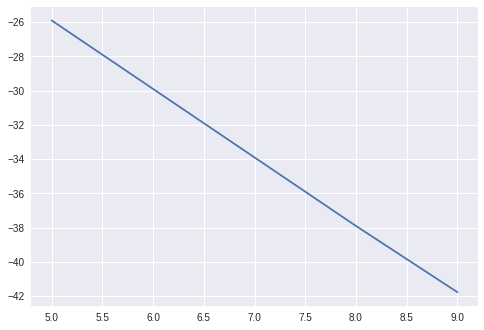

In [9]:
#Based on the previous notebook regarding finite difference convergence
#Given no point to start from, opt to use the same value the previous notebook used.

x_target = np.pi/3 #target point to be examined
y_target = np.cos(x_target) #exact derivative value at the target point

#No values of n are given either; use the same as the previous notebook.
nn = np.arange(5, 10)
hh = 1/np.power(2, nn) #step sizes to be taken

err = new_cfd(np.sin, x_target, hh) - y_target #errors corresponding to each step size
yy = np.log2(np.abs(err))
plt.plot(nn, yy)

Now, regress to determine the slope of the log-log plot.

In [10]:
import scipy.stats as ss
out = ss.linregress(nn,yy)
print('----->>>the convergence order is ' + str(-out[0]))

----->>>the convergence order is 3.9740851270963855


The convergence order is roughly 4, which matches our expectations.